In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [65]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [66]:
#df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [67]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [68]:
df.shape

(26219, 16)

In [69]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['AQI_Bucket','PM10'], axis = 1)

In [72]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.sort_index()


In [75]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [76]:
df['City'].value_counts()

Mumbai                1948
Bengaluru             1948
Ahmedabad             1948
Chennai               1948
Delhi                 1948
Lucknow               1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

# Forecasting for Chennai

before corona

In [0]:
df_chennai= df[df['City'] == 'Chennai']
df_chennai = df_chennai.drop('City' , axis = 1)
df_chennai.set_index('Date', inplace=True)


In [78]:
df_chennai.shape

(1948, 12)

In [79]:
df_chennai.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2015-01-01,71.828907,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.170000,9.029794,3.155895,175.840908
2015-01-02,71.828907,16.49,13.42,23.09,7.83,1.23,8.61,9.16,0.130000,9.029794,3.155895,175.840908
2015-01-03,71.828907,9.72,19.56,9.99,4.63,0.77,48.23,13.45,0.030000,9.029794,3.155895,175.840908
2015-01-04,71.828907,9.60,16.20,11.71,5.23,1.00,27.96,10.33,3.300132,9.029794,3.155895,175.840908
2015-01-05,71.828907,9.16,16.30,12.94,5.50,0.90,16.60,9.36,3.300132,9.029794,3.155895,175.840908


In [0]:
df_chennai_before_covid = df_chennai.loc['2016-01-01' : '2020-03-23' ]
df_chennai_after_covid = df_chennai.loc['2020-03-24' : ]

In [81]:
df_chennai_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-01,65.97,5.86,32.92,32.56,283.67,2.446235,0.94,34.570000,3.300132,9.029794,3.155895,125.0
2016-01-02,41.30,5.17,8.72,10.41,132.94,0.670000,15.60,34.374248,3.300132,9.029794,3.155895,123.0
2016-01-03,36.81,4.61,6.44,8.85,96.90,1.170000,2.91,34.374248,3.300132,9.029794,3.155895,106.0
2016-01-04,44.87,5.06,12.75,15.02,98.22,0.740000,3.33,31.840000,3.300132,9.029794,3.155895,63.0
2016-01-05,63.67,7.42,21.07,22.62,160.08,1.170000,2.71,18.990000,3.300132,9.029794,3.155895,132.0


In [82]:
df_chennai_before_covid.shape

(1544, 12)

In [0]:
df_chennai_before_covid=  df_chennai_before_covid.resample('W').mean()

In [84]:
df_chennai_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2016-01-03,48.026667,5.213333,16.026667,17.273333,171.170000,1.428745,6.483333,34.439499,3.300132,9.029794,3.155895,118.000000
2016-01-10,61.144286,6.935714,18.711429,20.634286,197.611429,1.111429,3.355714,20.425714,3.300132,9.029794,3.155895,130.857143
2016-01-17,56.838571,6.548571,18.034286,19.681429,174.045714,1.188571,3.591429,27.942857,3.300132,9.029794,3.155895,138.714286
2016-01-24,57.127143,5.762857,11.188571,13.055714,127.038571,1.574286,3.971429,34.624286,9.042914,7.318513,3.155895,154.714286
2016-01-31,51.907143,9.260000,14.742857,15.110000,76.711429,2.085714,3.531429,28.614286,5.802857,7.857143,3.155895,162.142857


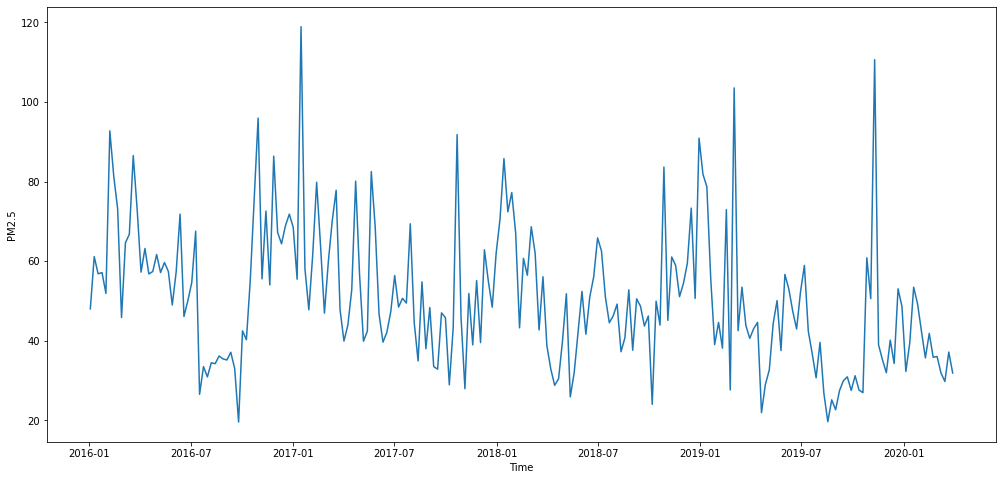

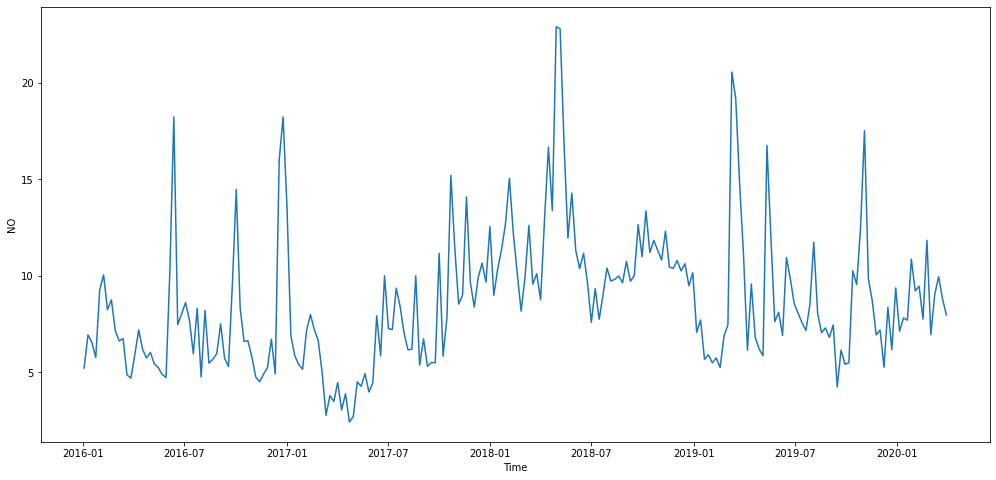

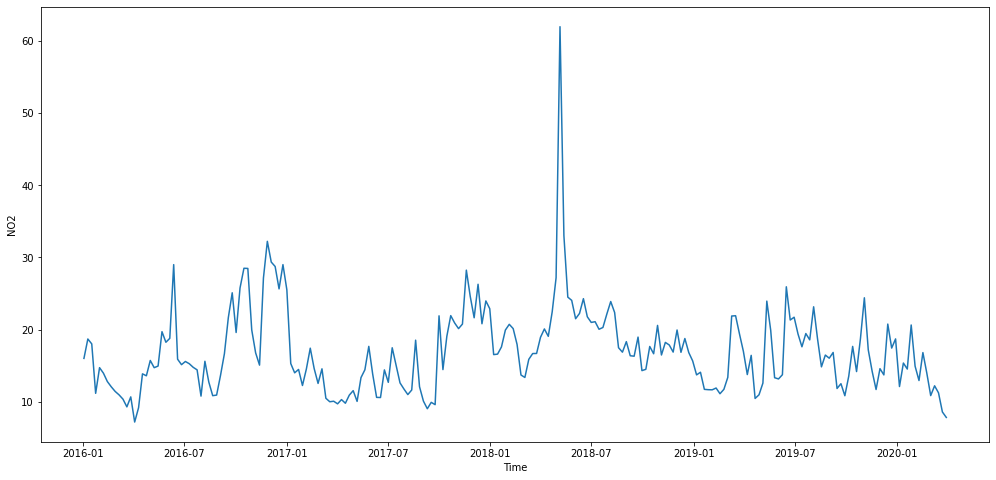

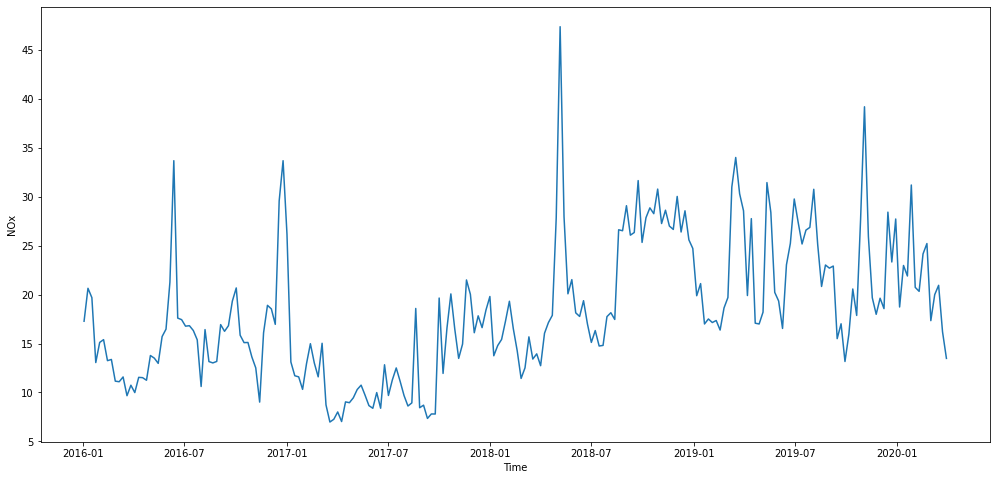

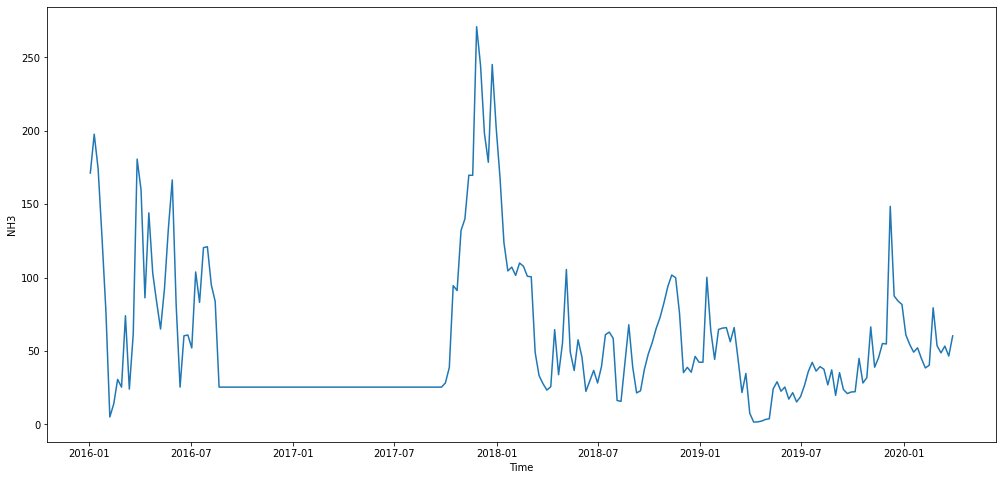

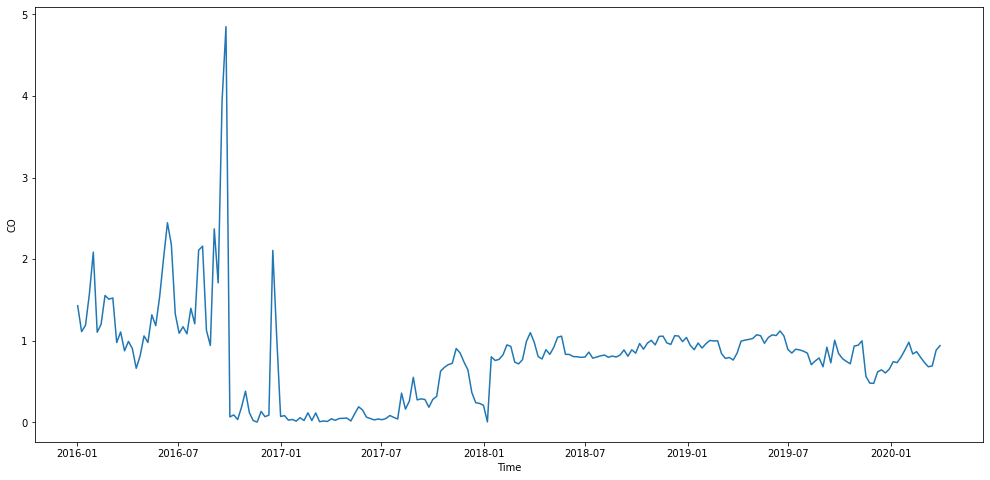

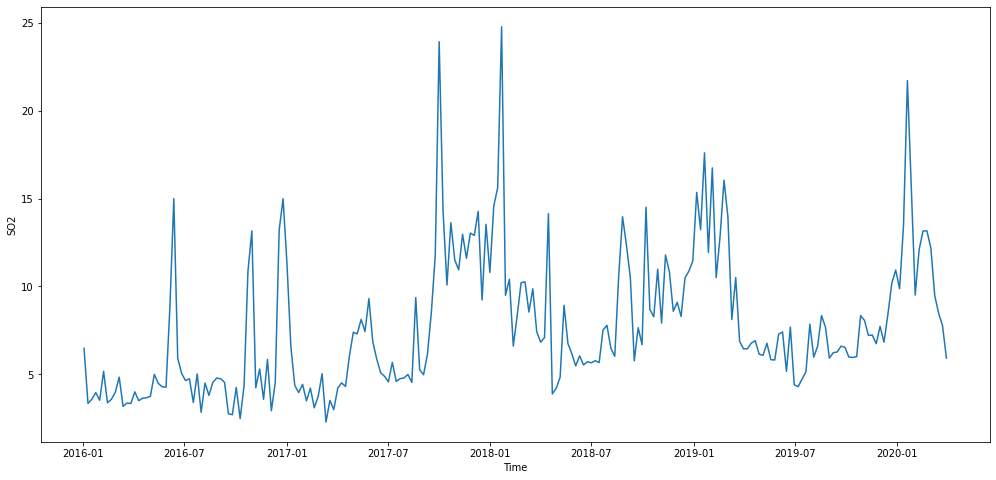

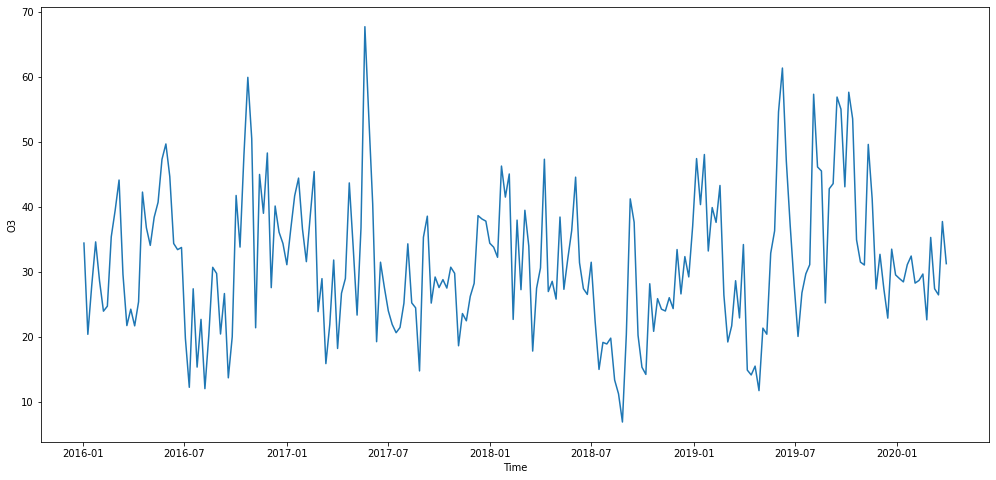

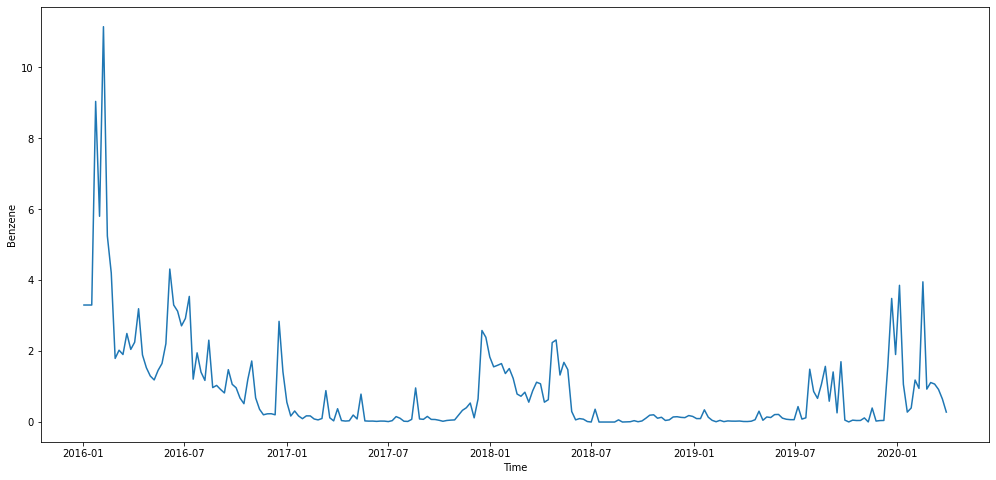

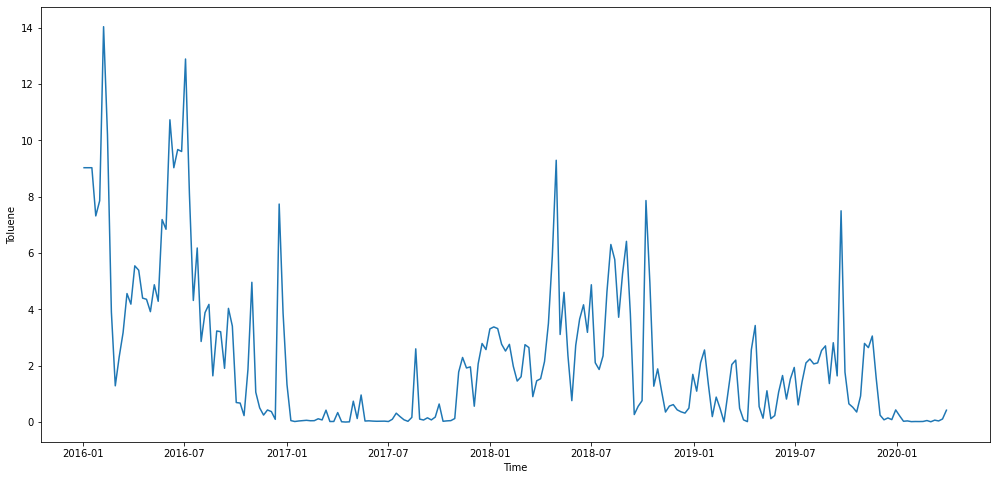

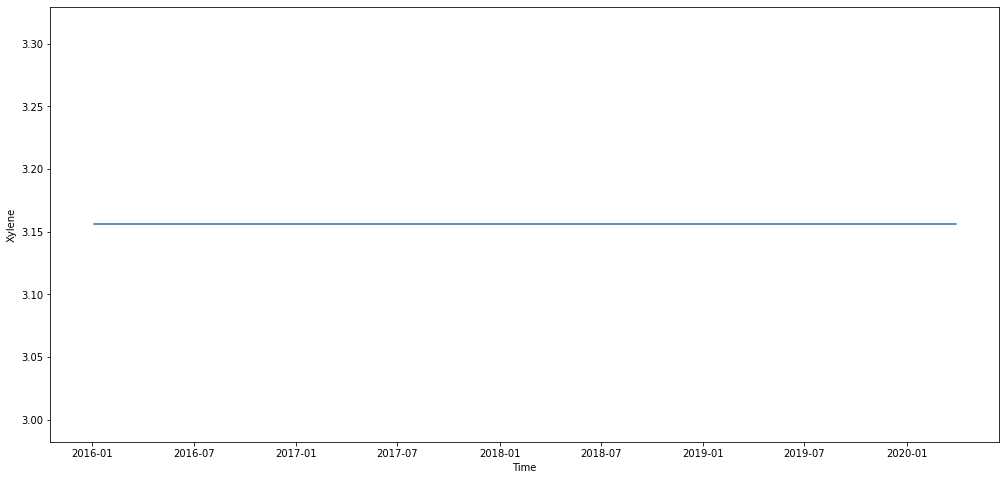

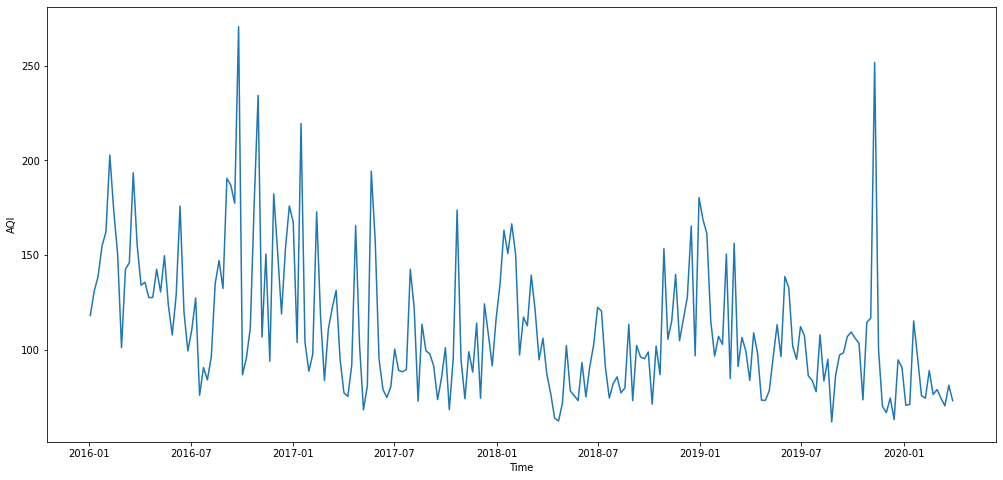

In [85]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_chennai_before_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_chennai_before_covid.columns:
    plot_data(col)

In [86]:
df_chennai_before_covid = df_chennai_before_covid.reset_index()
df_chennai_before_covid = df_chennai_before_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_chennai_before_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2016-01-03,48.026667,5.213333,16.026667,17.273333,171.17,1.428745,6.483333,34.439499,3.300132,9.029794,3.155895,118.0


# Modeling on before dataset

In [0]:
train  = df_chennai_before_covid

cols = train.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [89]:
train = train[cols]
train_y = train[['ds','y']]
train_y.head(3)

,ds,y
0,2016-01-03,118.000000
1,2016-01-10,130.857143
2,2016-01-17,138.714286


In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
m = Prophet()

In [0]:
#m.add_regressor('PM2.5')
#m.add_regressor('NO')
#m.add_regressor('NO2')
#m.add_regressor('NOx')
#m.add_regressor('NH3')
#m.add_regressor('CO')
#m.add_regressor('SO2')
#m.add_regressor('O3')
#m.add_regressor('Benzene')
#m.add_regressor('Toluene')
#m.add_regressor('Xylene')

In [93]:
m.fit(train_y)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,72.073196,34.497885,106.508433,72.054095,72.091259,-1.867741,-1.867741,-1.867741,-1.867741,-1.867741,-1.867741,0.0,0.0,0.0,70.205455
583,2021-03-26,72.038519,30.815595,104.315096,72.019325,72.056625,-3.257189,-3.257189,-3.257189,-3.257189,-3.257189,-3.257189,0.0,0.0,0.0,68.781330
584,2021-03-27,72.003843,28.920179,105.216618,71.984556,72.021991,-4.727000,-4.727000,-4.727000,-4.727000,-4.727000,-4.727000,0.0,0.0,0.0,67.276842
585,2021-03-28,71.969166,25.859047,102.134593,71.949787,71.987362,-6.253107,-6.253107,-6.253107,-6.253107,-6.253107,-6.253107,0.0,0.0,0.0,65.716060
586,2021-03-29,71.934490,25.652051,102.373205,71.915011,71.952782,-7.810038,-7.810038,-7.810038,-7.810038,-7.810038,-7.810038,0.0,0.0,0.0,64.124452


In [95]:
train_nox = train[['ds','NOx']]
train_nox = train_nox.rename({'NOx':'y'},axis=1)
m = Prophet()
m.fit(train_nox)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,28.244358,18.844587,32.113000,27.851786,28.668225,-2.687846,-2.687846,-2.687846,-2.687846,-2.687846,-2.687846,0.0,0.0,0.0,25.556512
583,2021-03-26,28.253248,18.335601,32.155328,27.857032,28.680749,-2.802682,-2.802682,-2.802682,-2.802682,-2.802682,-2.802682,0.0,0.0,0.0,25.450566
584,2021-03-27,28.262137,18.497502,31.428463,27.864970,28.693177,-2.925462,-2.925462,-2.925462,-2.925462,-2.925462,-2.925462,0.0,0.0,0.0,25.336675
585,2021-03-28,28.271027,18.625663,31.797438,27.871482,28.703602,-3.054616,-3.054616,-3.054616,-3.054616,-3.054616,-3.054616,0.0,0.0,0.0,25.216410
586,2021-03-29,28.279916,17.866412,31.597438,27.877995,28.713856,-3.188325,-3.188325,-3.188325,-3.188325,-3.188325,-3.188325,0.0,0.0,0.0,25.091591


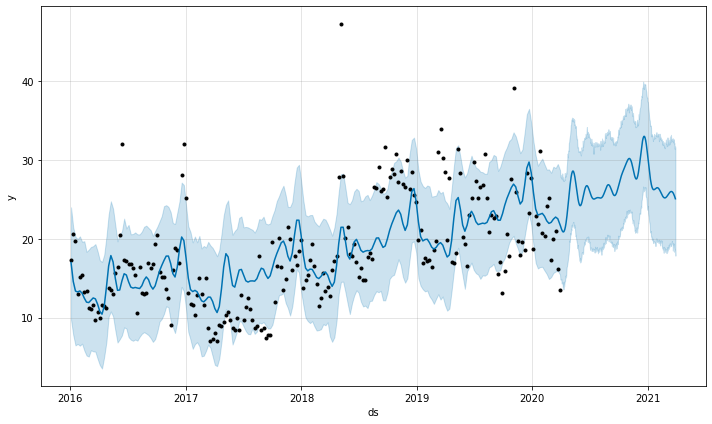

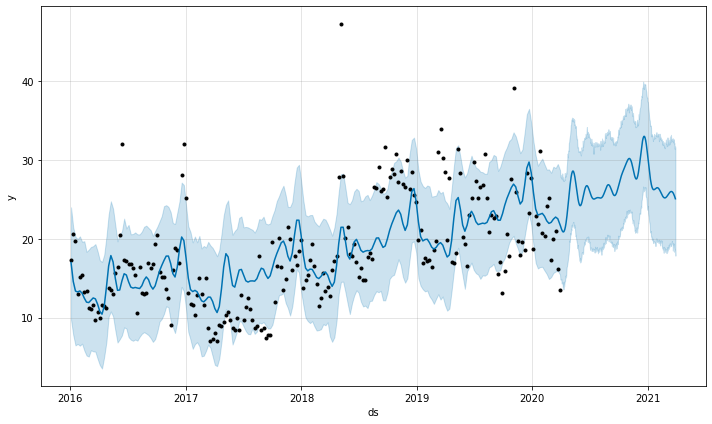

In [37]:
m.plot(forecast)

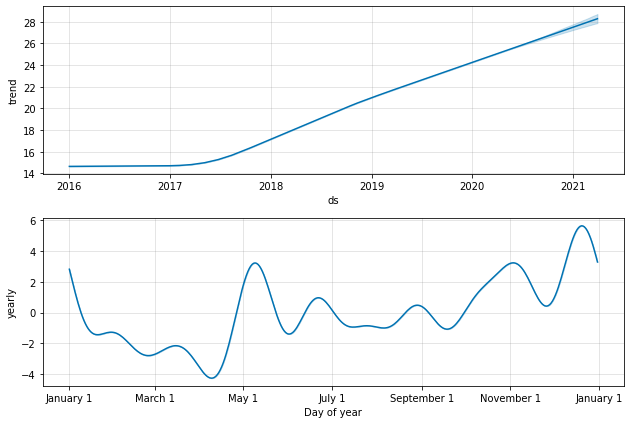

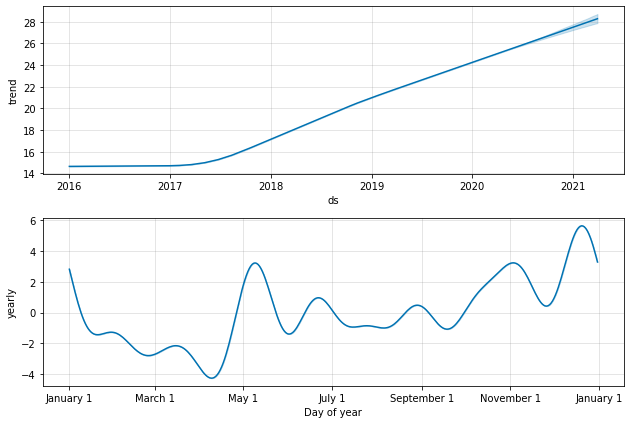

In [38]:
m.plot_components(forecast)

In [39]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(train_nox, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,16.981004,9.722685,24.005796,17.273333
2016-01-10,14.582141,7.776230,21.428613,20.634286
2016-01-17,13.366084,6.465934,20.266667,19.681429
2016-01-24,13.256456,6.651875,19.960878,13.055714
2016-01-31,13.383133,6.427276,20.317190,15.110000


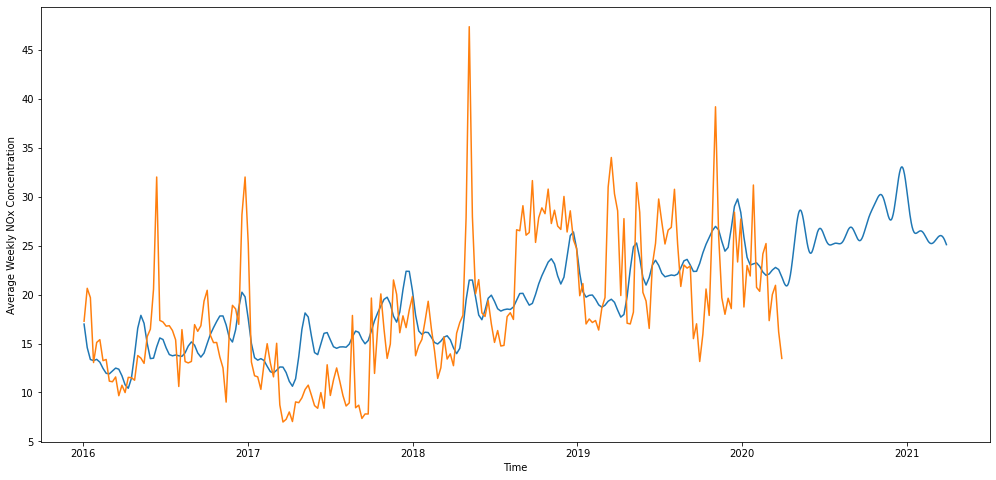

In [40]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])

plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()


# **During corona**

In [41]:
df_chennai_after_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2020-03-24,24.22,6.82,6.91,13.16,55.45,0.61,5.83,35.18,0.64,0.36,3.534433,57.0
2020-03-25,22.43,5.78,4.38,9.79,51.89,0.65,5.04,37.16,0.57,0.21,3.534433,58.0
2020-03-26,31.57,7.27,7.22,13.84,49.77,0.55,6.30,36.81,0.52,0.16,3.534433,54.0
2020-03-27,27.60,5.71,4.85,9.80,44.96,0.51,5.09,33.97,7.92,0.09,3.534433,59.0
2020-03-28,34.81,5.52,4.91,10.10,46.53,0.56,4.41,16.33,6.59,0.00,3.534433,55.0


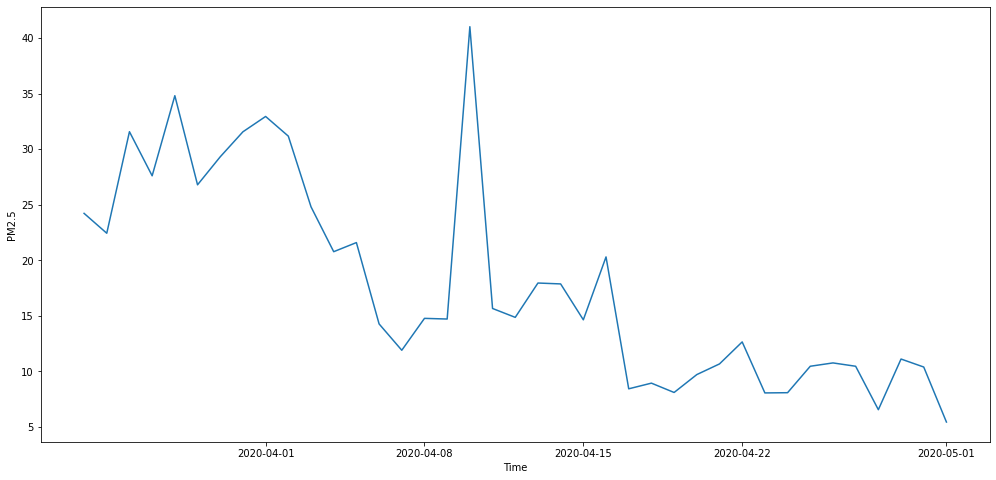

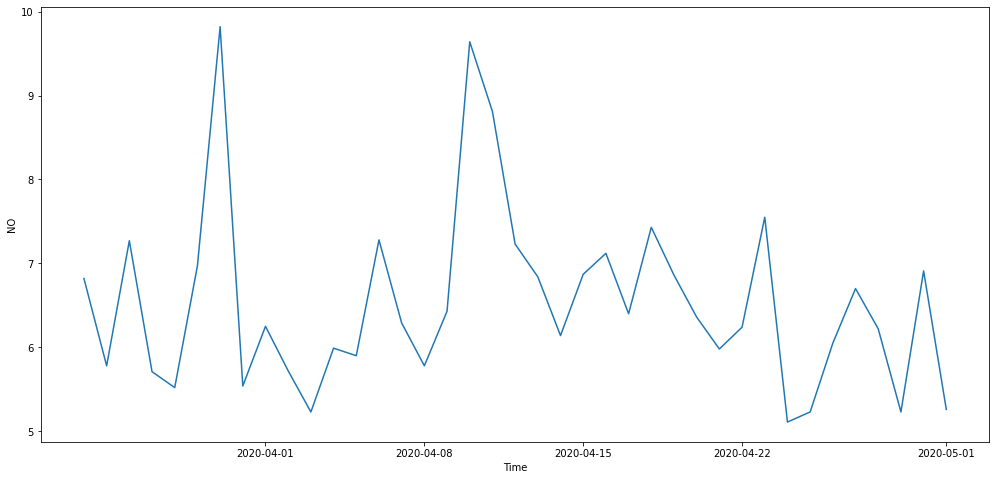

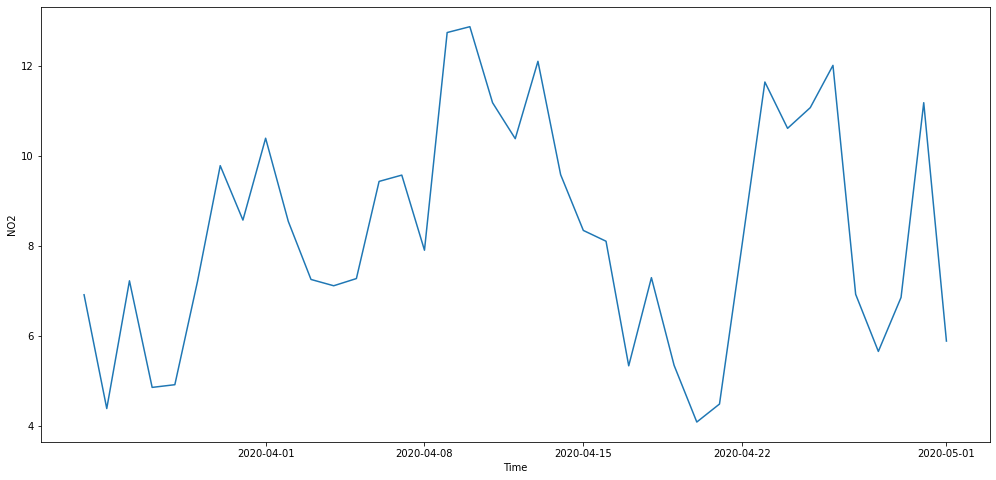

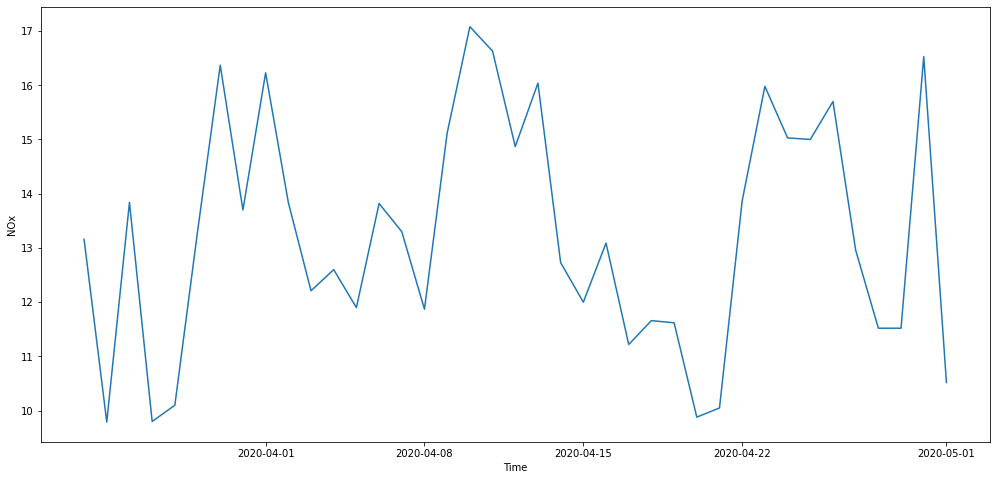

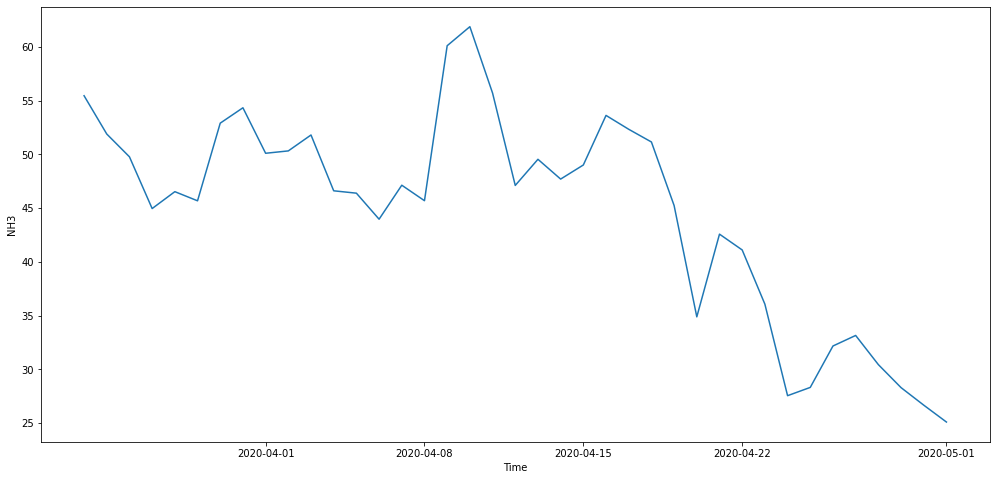

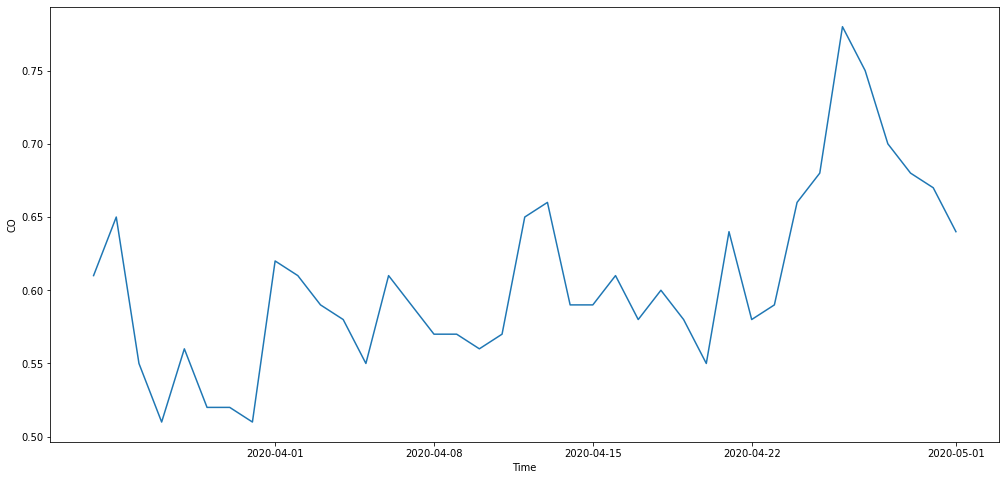

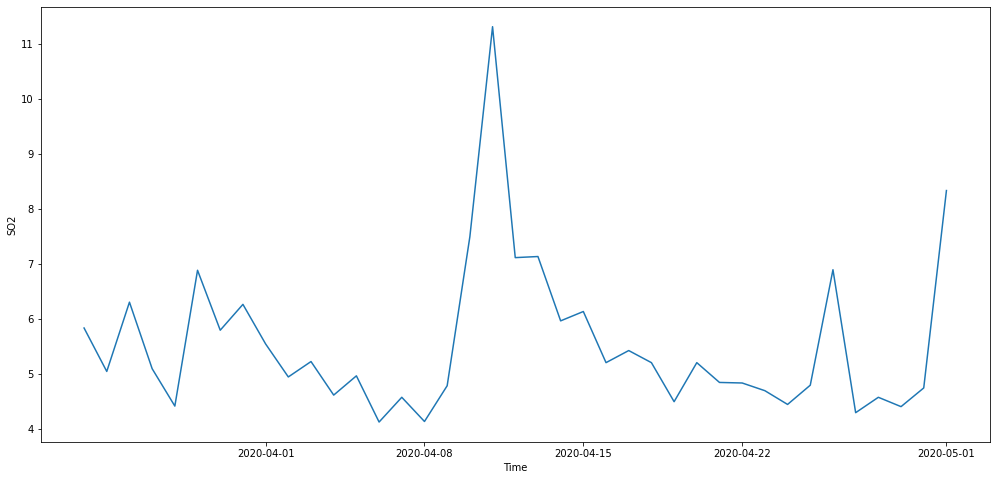

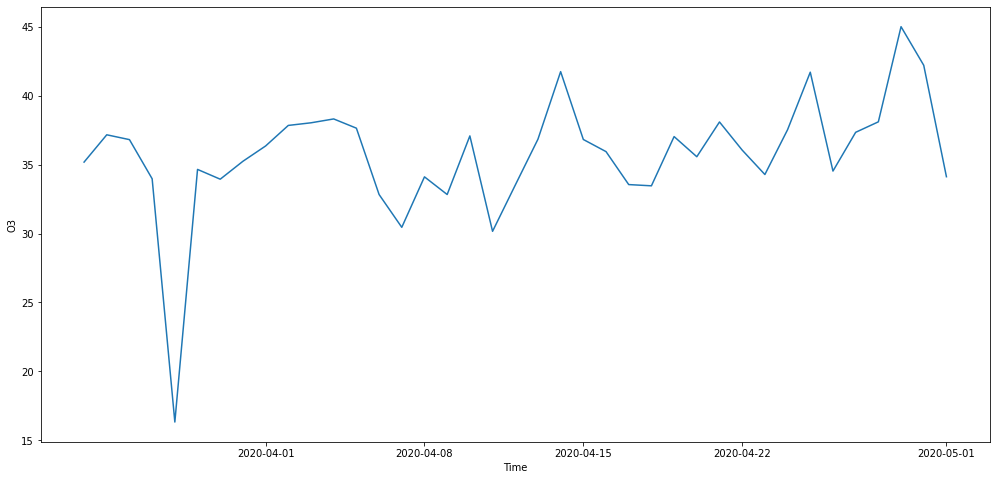

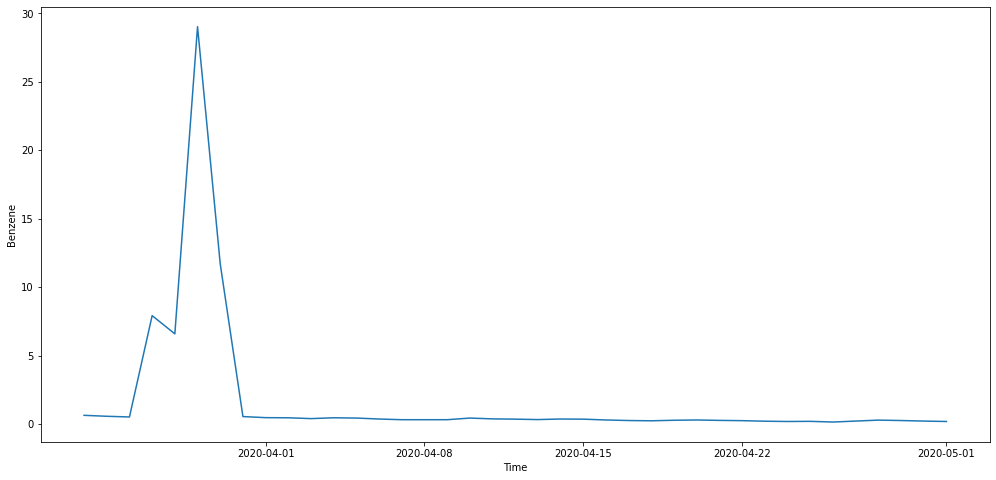

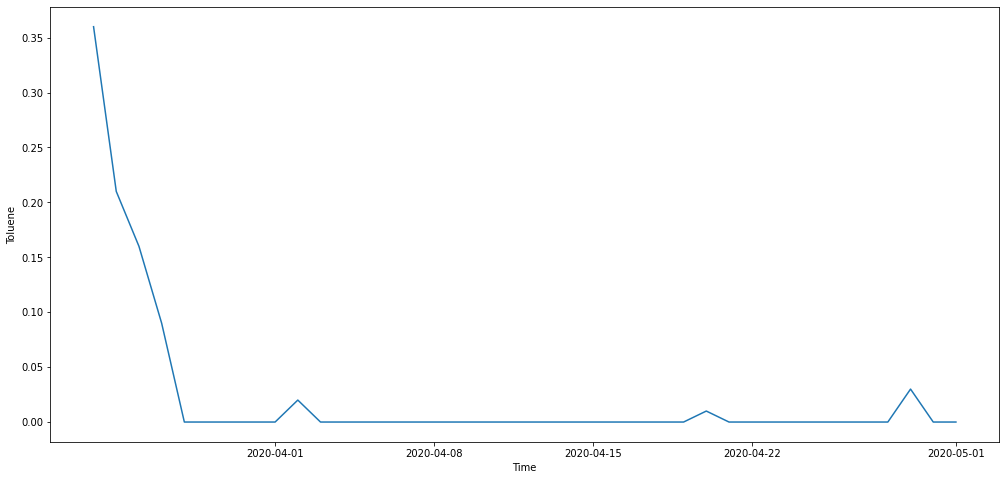

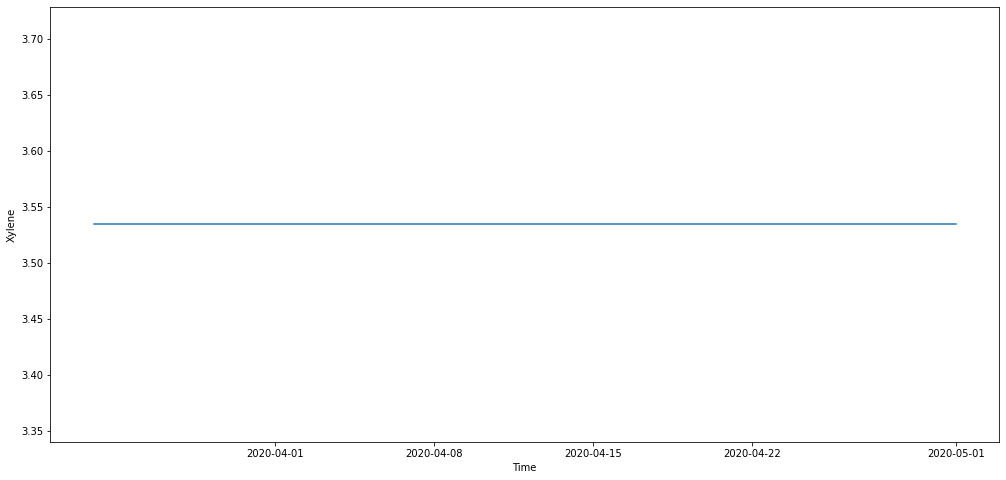

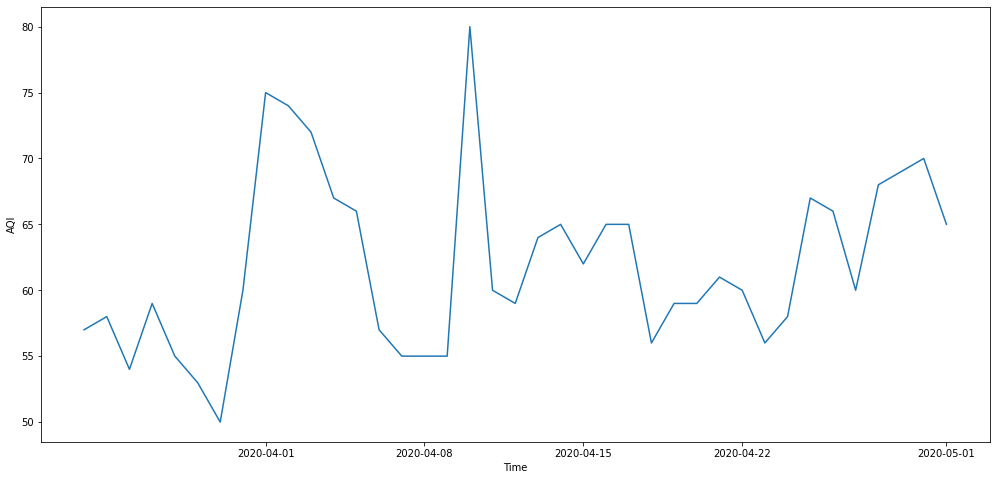

In [42]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_chennai_after_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_chennai_after_covid.columns:
    plot_data(col)

In [43]:
df_chennai_after_covid = df_chennai_after_covid.reset_index()
df_chennai_after_covid = df_chennai_after_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_chennai_after_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2020-03-24,24.22,6.82,6.91,13.16,55.45,0.61,5.83,35.18,0.64,0.36,3.534433,57.0


In [0]:
tr  = df_chennai_after_covid

cols = tr.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [46]:
tr_nox = tr[['ds','NOx']]
tr_nox = tr_nox.rename({'NOx':'y'},axis=1)
f1 = Prophet()
f1.fit(tr_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future1 = f1.make_future_dataframe(periods= 40 )
forecast1 = f1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,13.703836,11.184119,16.262519,13.703835,13.703837,-0.054462,-0.054462,-0.054462,-0.054462,-0.054462,-0.054462,0.0,0.0,0.0,13.649374
75,2020-06-07,13.711894,11.556843,16.488930,13.711893,13.711895,0.217535,0.217535,0.217535,0.217535,0.217535,0.217535,0.0,0.0,0.0,13.929430
76,2020-06-08,13.719952,11.781778,16.773702,13.719951,13.719953,0.545541,0.545541,0.545541,0.545541,0.545541,0.545541,0.0,0.0,0.0,14.265493
77,2020-06-09,13.728011,10.520711,15.458568,13.728010,13.728011,-0.838531,-0.838531,-0.838531,-0.838531,-0.838531,-0.838531,0.0,0.0,0.0,12.889480
78,2020-06-10,13.736069,10.424942,15.566493,13.736068,13.736070,-0.709884,-0.709884,-0.709884,-0.709884,-0.709884,-0.709884,0.0,0.0,0.0,13.026185


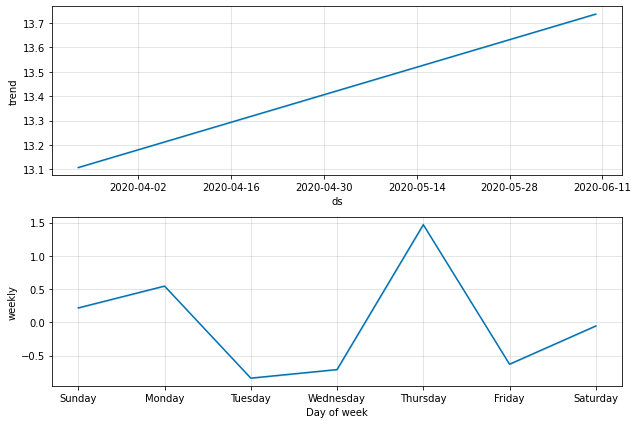

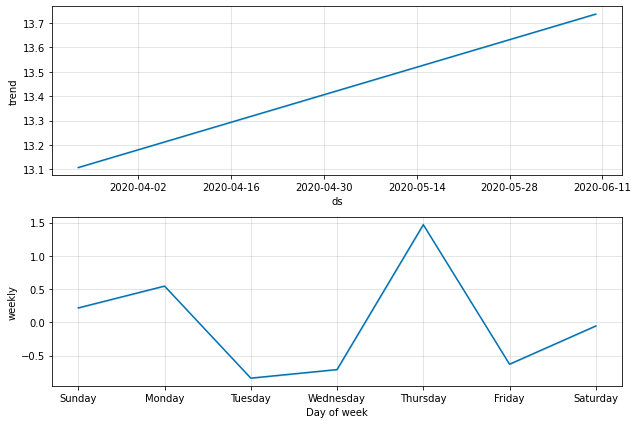

In [48]:
f1.plot_components(forecast1)

In [49]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1 = make_comparison_dataframe(tr_nox, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,12.268999,9.795292,14.604981,13.16
2020-03-25,12.405704,9.961390,15.122502,9.79
2020-03-26,14.592732,12.144160,17.223679,13.84
2020-03-27,12.502418,10.111810,15.239584,9.80
2020-03-28,13.085300,10.470595,15.363154,10.10


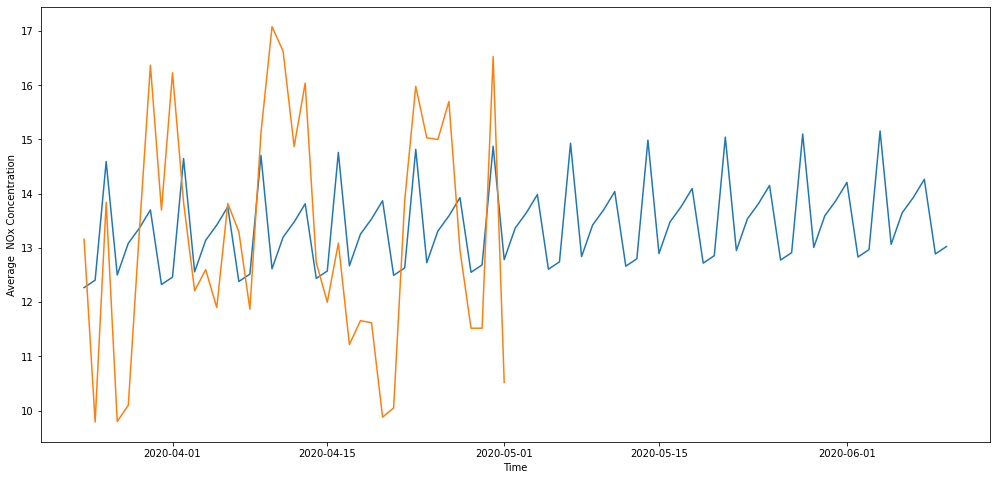

In [50]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])

plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average  NOx Concentration')
plt.grid(False)
plt.show()

**Now will do analysis for SO2 for before and after covid**

In [0]:
# before first

In [52]:
tr1_so2 = train[['ds','SO2']]
tr1_so2 = tr1_so2.rename({'SO2':'y'},axis=1)
s1 = Prophet()
s1.fit(tr1_so2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future1_so2 = s1.make_future_dataframe(periods= 365 )
forecast1_so2 = s1.predict(future1_so2)
forecast1_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
582,2021-03-25,8.870140,3.028286,10.186174,8.666227,9.072181,-2.056650,-2.056650,-2.056650,-2.056650,-2.056650,-2.056650,0.0,0.0,0.0,6.813490
583,2021-03-26,8.870167,3.118672,10.600242,8.664602,9.073110,-2.030898,-2.030898,-2.030898,-2.030898,-2.030898,-2.030898,0.0,0.0,0.0,6.839270
584,2021-03-27,8.870194,3.380750,10.607918,8.663053,9.074099,-1.990276,-1.990276,-1.990276,-1.990276,-1.990276,-1.990276,0.0,0.0,0.0,6.879919
585,2021-03-28,8.870221,2.945669,10.714257,8.662435,9.075137,-1.937566,-1.937566,-1.937566,-1.937566,-1.937566,-1.937566,0.0,0.0,0.0,6.932655
586,2021-03-29,8.870249,2.962315,10.819305,8.661883,9.075976,-1.875706,-1.875706,-1.875706,-1.875706,-1.875706,-1.875706,0.0,0.0,0.0,6.994542


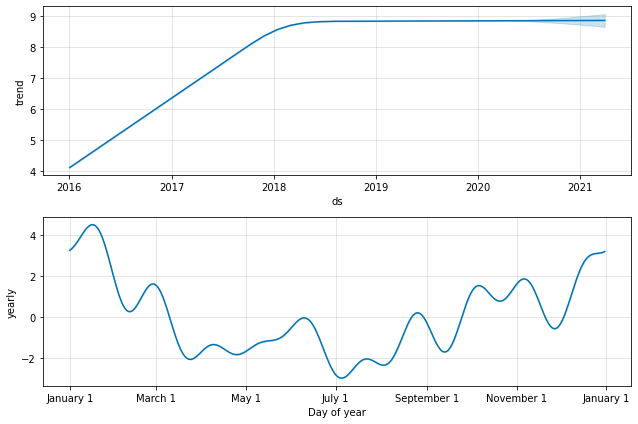

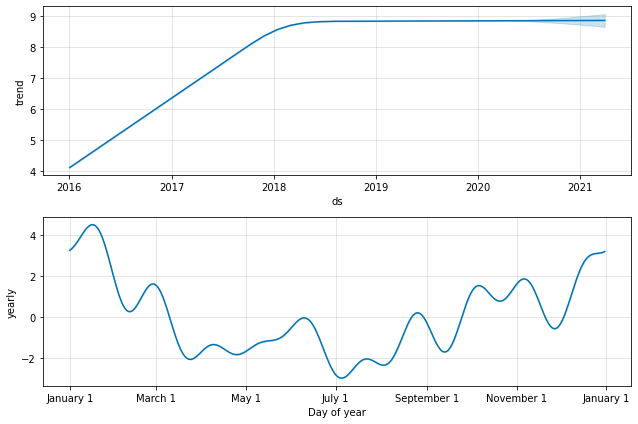

In [54]:
s1.plot_components(forecast1_so2)

In [55]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1_so2 = make_comparison_dataframe(tr1_so2, forecast1_so2)

cmp_df1_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,7.463549,3.778637,11.265925,6.483333
2016-01-10,8.188782,4.164619,12.206029,3.355714
2016-01-17,8.732142,4.897362,12.264216,3.591429
2016-01-24,8.127591,4.264436,11.634070,3.971429
2016-01-31,6.438870,2.648259,10.035001,3.531429


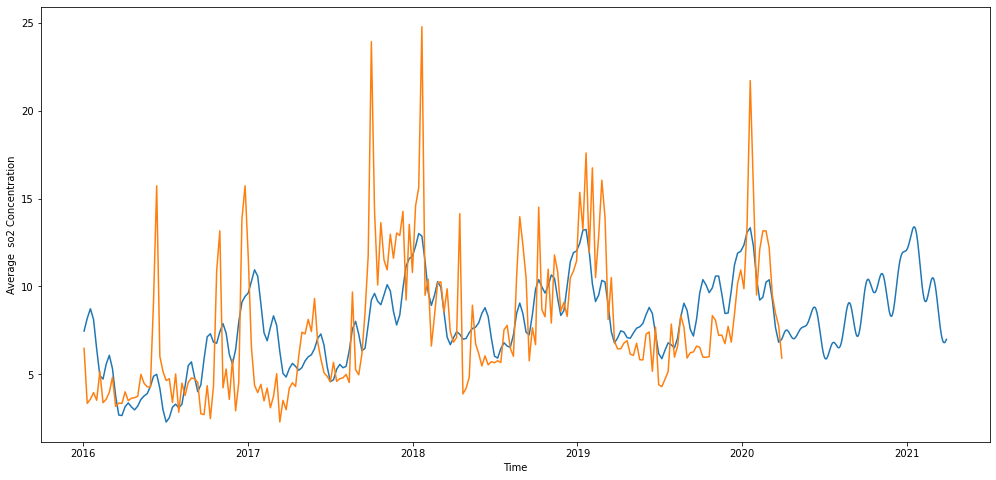

In [56]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1_so2['yhat'])

plt.plot(cmp_df1_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()

In [0]:
# after covid

In [58]:
tr2_so2 = tr[['ds','SO2']]
tr2_so2 = tr_nox.rename({'SO2':'y'},axis=1)
s2 = Prophet()
s2.fit(tr2_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future2_so2 = f1.make_future_dataframe(periods= 40 )
forecast2_so2 = f1.predict(future2_so2)
forecast2_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,13.703836,11.306393,16.212736,13.703835,13.703837,-0.054462,-0.054462,-0.054462,-0.054462,-0.054462,-0.054462,0.0,0.0,0.0,13.649374
75,2020-06-07,13.711894,11.336152,16.495373,13.711893,13.711895,0.217535,0.217535,0.217535,0.217535,0.217535,0.217535,0.0,0.0,0.0,13.929430
76,2020-06-08,13.719952,11.930168,16.906629,13.719951,13.719953,0.545541,0.545541,0.545541,0.545541,0.545541,0.545541,0.0,0.0,0.0,14.265493
77,2020-06-09,13.728011,10.361637,15.380344,13.728010,13.728011,-0.838531,-0.838531,-0.838531,-0.838531,-0.838531,-0.838531,0.0,0.0,0.0,12.889480
78,2020-06-10,13.736069,10.520847,15.470968,13.736068,13.736070,-0.709884,-0.709884,-0.709884,-0.709884,-0.709884,-0.709884,0.0,0.0,0.0,13.026185


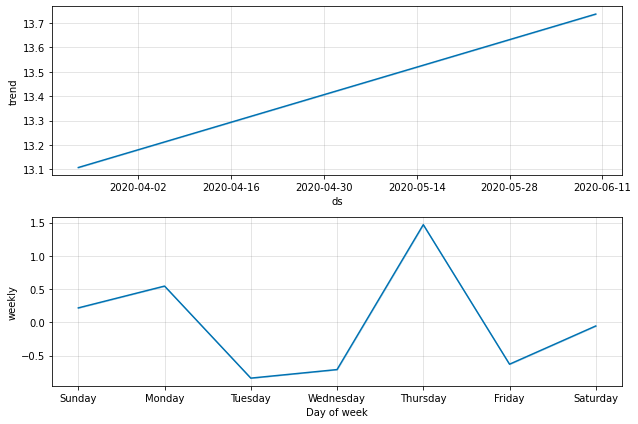

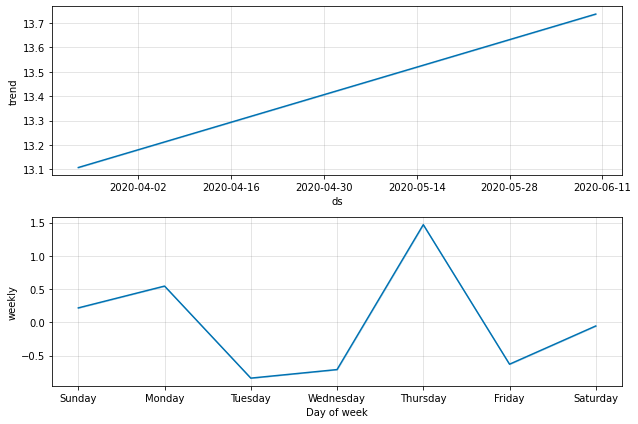

In [60]:
s2.plot_components(forecast2_so2)

In [61]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df2_so2 = make_comparison_dataframe(tr2_so2, forecast2_so2)

cmp_df2_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,12.268999,9.770766,14.802030,13.16
2020-03-25,12.405704,9.836413,14.967906,9.79
2020-03-26,14.592732,12.293999,17.203064,13.84
2020-03-27,12.502418,10.110755,14.971955,9.80
2020-03-28,13.085300,10.521325,15.585249,10.10


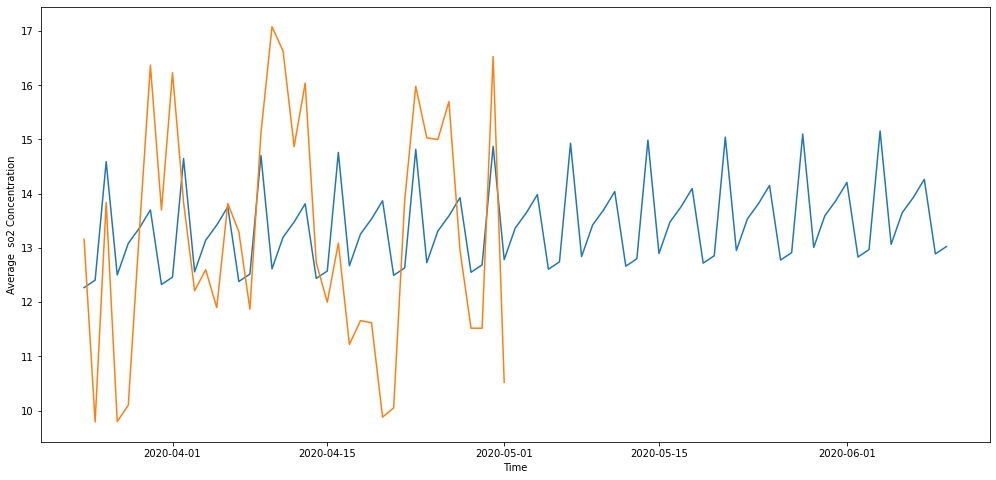

In [62]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2_so2['yhat'])

plt.plot(cmp_df2_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()